# NLP. Week 3. POS tagging and NER.


## POS tagging

One of the core tasks in Natural Language Processing (NLP) is Parts of Speech (PoS) tagging, which is giving each word in a text a grammatical category, such as nouns, verbs, adjectives, and adverbs. Through improved comprehension of phrase structure and semantics, this technique makes it possible for machines to study and comprehend human language more accurately.


In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
%%capture
import nltk
import os
from nltk import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

nltk.download("maxent_ne_chunker", quiet=True)
nltk.download("words", quiet=True)
nltk.download("punkt", quiet=True)
nltk.download("averaged_perceptron_tagger", quiet=True)
nltk.download("tagsets", quiet=True)
nltk.download("conll2000", quiet=True)

In [3]:
sentence = word_tokenize("allow us to add lines in list of allow actions")
nltk.pos_tag(sentence)

[('allow', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('add', 'VB'),
 ('lines', 'NNS'),
 ('in', 'IN'),
 ('list', 'NN'),
 ('of', 'IN'),
 ('allow', 'JJ'),
 ('actions', 'NNS')]

## Shallow Parsing or Chunking

A process of extracting phrases from unstructured text. Chunking groups adjacent tokens into phrases on the basis of their POS tags. There are some standard well-known chunks such as noun phrases, verb phrases, and prepositional phrases.

There are 5 major categories of phrases :

- Noun phrase (NP)
- Adjective phrase (ADJP)
- Verb phrase (VP)
- Prepositional phrase (PP)
- Adverb phrase (ADVP)


In [4]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
print(data[1])

(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


## 3. Constituency Parsing

Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. A constituency parser can be built based on such grammars/rules. The grammer has to be defined.

One of the popular Constituency Parsing implementation is from stanford. A **probabilistic context-free grammar parser**

Tag information can be found [here](https://web.archive.org/web/20130517134339/http://bulba.sdsu.edu/jeanette/thesis/PennTags.html)


In [5]:
%%capture
!wget https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip
!unzip stanford-parser-4.2.0.zip

In [6]:
from nltk.parse.stanford import StanfordParser

scp = StanfordParser(
    "stanford-parser-full-2020-11-17/stanford-parser.jar",
    "stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar",
)

sentence = "Innopolis University is a university located in the city of Innopolis."

result = list(scp.raw_parse(sentence))
print(result[0])

(ROOT
  (S
    (NP (NNP Innopolis) (NNP University))
    (VP
      (VBZ is)
      (NP
        (NP (DT a) (NN university))
        (VP
          (VBN located)
          (PP
            (IN in)
            (NP
              (NP (DT the) (NN city))
              (PP (IN of) (NP (NNP Innopolis))))))))
    (. .)))


In [7]:
# !pip install svgling

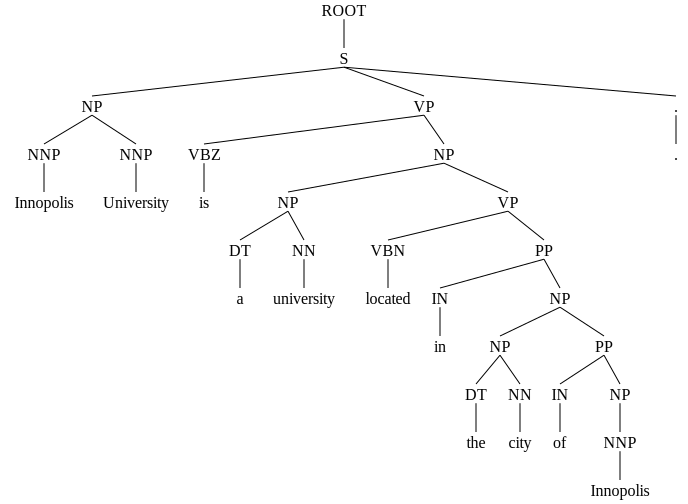

In [8]:
from IPython.display import display

display(result[0])

## Dependency Parsing

In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence.

![](https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png)

Dependency Parsing used in shallow parsing and named entity recognition


In [9]:
%%capture
!python -m spacy download en_core_web_sm

In [10]:
import spacy

text_processing_pipeline = spacy.load("en_core_web_sm")

processed_sentence = text_processing_pipeline(
    "Innopolis University is a university located in the city of Innopolis."
)

In [11]:
from spacy import displacy

displacy.render(
    processed_sentence,
    jupyter=True,
    options={"distance": 110, "arrow_stroke": 2, "arrow_width": 8},
)

## 5. Named Entity Recognition

Named Entity Recognition (NER) is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on.


In [12]:
sentence = "European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices"

### Perfrom NER with spacy


In [13]:
from collections import Counter
import en_core_web_sm

In [14]:
text_processing_pipeline = en_core_web_sm.load()
doc = text_processing_pipeline(sentence)
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [15]:
displacy.render(doc, style="ent", jupyter=True)

## Task

[Competition](https://www.kaggle.com/t/9e6b9b00b0094375a888823b8ecf78d7)

Your goal is to perform NER on recipe ingridients. For more details go to the competition


In [16]:
import spacy
from tqdm.notebook import tqdm
import pandas as pd

import random
from spacy.training import Example
from spacy.util import minibatch
from spacy.tokenizer import Tokenizer
import re

In [17]:
CLASS_MAPPING = {
    0: "DF",
    1: "NAME",
    2: "O",
    3: "QUANTITY",
    4: "SIZE",
    5: "STATE",
    6: "TEMP",
    7: "UNIT",
}
INVERSE_CLASS_MAPPING = {v: k for k, v in CLASS_MAPPING.items()}

In [18]:
df = pd.read_csv("train.csv")
df.head()

,tokens,labels
0,4 cloves garlic 2 cups cooked corned beef -LRB...,3 7 1 3 7 5 5 1 2 2 2 2
1,"2 tablespoons vegetable oil , divided 1 1/2 cu...",3 7 1 1 2 5 3 7 5 1
2,2 tablespoons dried marjoram 3 tablespoons pac...,3 7 0 1 3 7 5 1 1
3,"1 large red onion , 1/4-inch slices pulled int...",3 4 1 1 2 2 2 2 2 2 3 7 1 2 5
4,"2 jalapeno peppers , seeded and minced 1/2 - 3...",3 1 1 2 5 2 5 3 2 2 7 5 1 1


In [ ]:
train_data = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    tokens, labels = row["tokens"].split(" "), row["labels"].split(" ")
    entities = []
    position = 0
    for token, label in zip(tokens, labels):
        class_name = CLASS_MAPPING[int(label)]
        if class_name != "O":
            entities.append((position, position + len(token), class_name))
        position += len(token) + 1
    train_data.append((row["tokens"], {"entities": entities}))

In [20]:
train_data[0]

('4 cloves garlic 2 cups cooked corned beef -LRB- or canned -RRB-',
 {'entities': [(0, 1, 'QUANTITY'),
   (2, 8, 'UNIT'),
   (9, 15, 'NAME'),
   (16, 17, 'QUANTITY'),
   (18, 22, 'UNIT'),
   (23, 29, 'STATE'),
   (30, 36, 'STATE'),
   (37, 41, 'NAME')]})

In [21]:
text_processing_pipeline = spacy.blank("en")
text_processing_pipeline.add_pipe("ner", last=True)
ner = text_processing_pipeline.get_pipe("ner")

In [22]:
for _, annotations in train_data:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])
text_processing_pipeline.tokenizer = Tokenizer(
    text_processing_pipeline.vocab,
    token_match=re.compile(r"\S+").match,
)

In [ ]:
optimizer = text_processing_pipeline.begin_training()
epochs = 2
text_processing_pipeline.initialize()
for i in range(epochs):
    random.shuffle(train_data)
    losses = {}
    for batch in tqdm(minibatch(train_data, 8), total=len(train_data) // 8 + 1):
        examples = []
        for text, annotations in batch:
            examples.append(
                Example.from_dict(text_processing_pipeline.make_doc(text), annotations)
            )
        text_processing_pipeline.update(
            examples, drop=0.5, sgd=optimizer, losses=losses
        )
    print(losses)

In [24]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,token
0,0,1/2
1,1,large
2,2,sweet
3,3,red
4,4,onion


In [25]:
results = []
for i, row in test_df.iterrows():
    res = text_processing_pipeline(row["token"]).ents
    if res:
        results.append(INVERSE_CLASS_MAPPING[res[0].label_])
    else:
        results.append(INVERSE_CLASS_MAPPING["O"])

In [26]:
test_df["label"] = results
test_df = test_df.drop("token", axis=1)
test_df.to_csv("benchmark.csv", index=False)